# Tarea 1: DS Lab
- Ricardo Arancibia
- José Díaz
- Javier Santibáñez

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Parte 1.**

In [2]:
#1.
df_all = pd.read_csv('data/raw/w{}/metrocuadrado_all_w{}.csv'.format(str(13),str(13)))
for NN in range(14,18):
    direc = 'data/raw/w{}/metrocuadrado_all_w{}.csv'.format(str(NN),str(NN))
    df_aux = pd.read_csv(direc)
    df_all = pd.concat([df_all,df_aux], ignore_index= True)
df_all.drop_duplicates(inplace=True, ignore_index= True)
print(df_all.shape)
df_all.head()

(16295, 8)


,property_type|rent_type|location,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index
0,"Casa en Arriendo, LA SOLEDAD NORTE Bogotá D.C..",$1.050.000,3,2,63.0 m2,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6
1,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3,2,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3
2,"Casa en Arriendo, VILLA DE LOS ALPES II SECTOR...",$750.000,3,1,90.0 m2,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2
3,"Casa en Arriendo, PARIS GAITAN Bogotá D.C..",$3.400.000,5,4,71.0 m2,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0
4,"Casa en Arriendo, BALCONES DE ORIENTE Bogotá D...",$1.560.000,4,3,96.0 m2,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1


In [3]:
#1.
df_fur = pd.read_csv('data/raw/w{}/metrocuadrado_furnished_w{}.csv'.format(str(13),str(13)))
for NN in range(14,18):
    direc = 'data/raw/w{}/metrocuadrado_furnished_w{}.csv'.format(str(NN),str(NN))
    df_aux = pd.read_csv(direc)
    df_fur = pd.concat([df_fur,df_aux], ignore_index= True)
df_fur.drop_duplicates(inplace=True, ignore_index= True)
print(df_fur.shape)
df_fur.head()

(2099, 8)


,property_type|rent_type|location,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index
0,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3.0,2.0,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3
1,"Casa en Venta Y Arriendo, BELLAVISTA Bogotá D.C..",$1.300.000,3.0,2.0,72.0 m2,"hermosa casa en venta y en arriendo en, mandal...",https://www.metrocuadrado.com/inmueble/venta-c...,41.4
2,"Casa en Arriendo, PORTALES DEL NORTE Bogotá D.C..",$1.800.000,3.0,3.0,76.81 m2,Estrato 4. CASA TRIPLEX!! Exterior . Cuenta co...,https://www.metrocuadrado.com/inmueble/arriend...,41.3
3,"Casa en Venta Y Arriendo, SANTA SOFIA Bogotá D...",$1.500.000,5.0,3.0,76.22 m2,"Casa en Santa Sofia, excelente ubicación sobre...",https://www.metrocuadrado.com/inmueble/venta-c...,34.2
4,"Casa en Venta Y Arriendo, URBANIZACION SABANA ...",$145.000.000,3.0,2.0,77.0 m2,"Casa esquinera, de tres niveles, se venden mue...",https://www.metrocuadrado.com/inmueble/venta-c...,62.5


In [4]:
#1.

#Paso a -1 los nan primero para poder usar astype
df_fur['n_rooms'] = df_fur.n_rooms.fillna(value = -1).astype(int)
df_fur['n_bath'] = df_fur.n_bath.fillna(value = -1).astype(int)

#Convierto la columna al mismo tipo que en df_all
convert_types = {'n_rooms': str, 'n_bath': str}
df_fur = df_fur.astype(convert_types)

#Uno los df sobre todas las columnas
df2 = pd.merge(df_all, df_fur, how = 'outer', on = list(df_all.columns), indicator=True)


#Reporto el número de observaciones solo en archivo con furnished
right_only = len(df2.loc[df2['_merge'] == 'right_only', '_merge'])
print(f"Observaciones exclusivas del archivo con furnished: {right_only}")

#Cambio los nombres
df2 = df2.astype({'_merge': str})
df2.loc[(df2['_merge'] == 'both') | (df2['_merge'] == 'right_only'), '_merge'] = True
df2.loc[(df2['_merge'] == 'left_only'), '_merge'] = False
df2 = df2.astype({'_merge': bool})



#Cambio el nombre de la columna y la convierto a tipo categórica
df2.rename(columns = {'_merge': 'furnished'}, inplace = True)
df2.astype({'furnished': 'category'})

#Relleno valores faltante de df2 usando df_fur
#OBS: se usa un multi-indice triple para obtener un identificador único, salvo filas repetidas
#OBS2: drop = False es para no botar la columna del df y luego solo resetear los índices
A = df2.set_index(['url', 'surface', 'metrocuadrado_index'], drop = False).copy()
B = df_fur.set_index(['url', 'surface', 'metrocuadrado_index'], drop = False).copy()

#Realizo el relleno de datos
df = A.combine_first(B)


#Arreglo los índices y elimino duplicados
df.reset_index(drop = True, inplace = True)
df.drop_duplicates(inplace=True, ignore_index= True)

df

Observaciones exclusivas del archivo con furnished: 12


,details,furnished,metrocuadrado_index,n_bath,n_rooms,price,property_type|rent_type|location,surface,url
0,"Hermoso apartamento con acabados modernos, en ...",False,61.8,1,1,$2.100.000,"Apartamento en Arriendo, Bogotá D.C..",44.0 m2,https://www.metrocuadrado.com/inmueble/arriend...
1,"APARTAESTUDIO, ACOGEDOR, 47 MTS, UNA ALCOBA, U...",False,44.8,1,1,$1.520.000,"Apartamento en Arriendo, Bogotá D.C..",47.0 m2,https://www.metrocuadrado.com/inmueble/arriend...
2,"Hermoso apartaestudio con chimenea, excelente ...",False,56.3,1,1,$2.300.000,"Apartamento en Arriendo, Bogotá D.C..",60.0 m2,https://www.metrocuadrado.com/inmueble/arriend...
3,"Hermoso apartamento con chimenea,garaje, depos...",False,67.4,1,1,$2.060.000,"Apartamento en Arriendo, Bogotá D.C..",65.0 m2,https://www.metrocuadrado.com/inmueble/arriend...
4,Hermoso apartamento con espacios bien distribu...,False,49.3,1,1,$1.850.000,"Apartamento en Arriendo, Bogotá D.C..",40.0 m2,https://www.metrocuadrado.com/inmueble/arriend...
...,...,...,...,...,...,...,...,...,...
16302,"VENDO O ARRIENDO LINDA CASA, AREA CONSTRUIDA 3...",False,53.9,5,4,$10.000.000,"Casa en Venta Y Arriendo, VILLA DEL PRADO Bogo...",330.0 m2,https://www.metrocuadrado.com/inmueble/venta-c...
16303,Casa de dos pisos 1 piso cuenta con 1 parquead...,False,20.1,2,3,$1.400.000,"Casa en Venta Y Arriendo, VILLA DEL RIO Bogotá...",110.0 m2,https://www.metrocuadrado.com/inmueble/venta-c...
16304,SE VENDE CASA DE DOS NIVELES PRIMER NIVEL CONS...,False,41.8,2,2,$700.000,"Casa en Venta Y Arriendo, VILLA RIOS Bogotá D.C..",93.0 m2,https://www.metrocuadrado.com/inmueble/venta-c...
16305,Magnífica casa en venta o arriendo. Ubicada en...,False,48.6,3,3,$2.800.000,"Casa en Venta Y Arriendo, VILLAS DEL MEDITERRA...",174.0 m2,https://www.metrocuadrado.com/inmueble/venta-c...


In [5]:
df.isna().sum()

details                             110
furnished                             0
metrocuadrado_index                   0
n_bath                              226
n_rooms                              32
price                                 0
property_type|rent_type|location      0
surface                               0
url                                   0
dtype: int64

In [6]:
df.dtypes

details                              object
furnished                              bool
metrocuadrado_index                 float64
n_bath                               object
n_rooms                              object
price                                object
property_type|rent_type|location     object
surface                              object
url                                  object
dtype: object

**Parte 2.**

**(a)**

In [7]:
#Limpio las columnas price, n_rooms, n_bath y surface


#Paso a -1 los nan primero para poder usar astype
df['n_rooms'] = df.n_rooms.fillna(value = str(-1))
df['n_bath'] = df.n_bath.fillna(value = str(-1) )


#Limpio símbolos especiales y defino tipos adecuados

df['price'] = df['price'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace('.','')).astype(np.float64)
df['surface'] = df['surface'].apply(lambda x: x.replace('m2','')).astype(np.float64)
#df['n_bath'] = df['n_bath'].apply(lambda x: x.replace('+','')).astype(int)
#df['n_rooms'] = df['n_rooms'].apply(lambda x: x.replace('+','')).astype(int)

df.head()

,details,furnished,metrocuadrado_index,n_bath,n_rooms,price,property_type|rent_type|location,surface,url
0,"Hermoso apartamento con acabados modernos, en ...",False,61.8,1,1,2100000.0,"Apartamento en Arriendo, Bogotá D.C..",44.0,https://www.metrocuadrado.com/inmueble/arriend...
1,"APARTAESTUDIO, ACOGEDOR, 47 MTS, UNA ALCOBA, U...",False,44.8,1,1,1520000.0,"Apartamento en Arriendo, Bogotá D.C..",47.0,https://www.metrocuadrado.com/inmueble/arriend...
2,"Hermoso apartaestudio con chimenea, excelente ...",False,56.3,1,1,2300000.0,"Apartamento en Arriendo, Bogotá D.C..",60.0,https://www.metrocuadrado.com/inmueble/arriend...
3,"Hermoso apartamento con chimenea,garaje, depos...",False,67.4,1,1,2060000.0,"Apartamento en Arriendo, Bogotá D.C..",65.0,https://www.metrocuadrado.com/inmueble/arriend...
4,Hermoso apartamento con espacios bien distribu...,False,49.3,1,1,1850000.0,"Apartamento en Arriendo, Bogotá D.C..",40.0,https://www.metrocuadrado.com/inmueble/arriend...


In [8]:
df.price.nsmallest(10)

15676         0.0
15848         0.0
15874         0.0
7770     100000.0
23       111111.0
1889     284010.0
9804     299000.0
4760     300000.0
5383     300000.0
4418     333123.0
Name: price, dtype: float64

In [9]:
df.surface.nsmallest(20)

1889      0.0
1917      0.0
4139      0.0
4160      0.0
4418      0.0
4930      0.0
4931      0.0
5770      0.0
8015      0.0
8042      0.0
8867      0.0
9523      0.0
9524      0.0
10456     0.0
10747     0.0
10913     0.0
6298      1.0
730       4.0
7173      4.0
4340     15.0
Name: surface, dtype: float64

In [10]:
df.isna().sum()

details                             110
furnished                             0
metrocuadrado_index                   0
n_bath                                0
n_rooms                               0
price                                 0
property_type|rent_type|location      0
surface                               0
url                                   0
dtype: int64

In [11]:
df.dtypes

details                              object
furnished                              bool
metrocuadrado_index                 float64
n_bath                               object
n_rooms                              object
price                               float64
property_type|rent_type|location     object
surface                             float64
url                                  object
dtype: object

In [12]:
#Quito los precios nulos y las superficies menores o iguales a 4m^2

df.loc[df.price == 0, 'price'] = np.nan
df.loc[df.surface <= 4, 'surface'] = np.nan


#Quito los valores -1 introducidos antes en n_rooms y n_bath para poder cambiar el type de la serie
df.loc[(df['n_rooms'] == -1) , 'n_rooms'] = np.nan
df.loc[df['n_bath'] == -1, 'n_bath'] = np.nan


print(f'El DataFrame queda con {len(df) } observaciones ')

df

El DataFrame queda con 16307 observaciones 


,details,furnished,metrocuadrado_index,n_bath,n_rooms,price,property_type|rent_type|location,surface,url
0,"Hermoso apartamento con acabados modernos, en ...",False,61.8,1,1,2100000.0,"Apartamento en Arriendo, Bogotá D.C..",44.0,https://www.metrocuadrado.com/inmueble/arriend...
1,"APARTAESTUDIO, ACOGEDOR, 47 MTS, UNA ALCOBA, U...",False,44.8,1,1,1520000.0,"Apartamento en Arriendo, Bogotá D.C..",47.0,https://www.metrocuadrado.com/inmueble/arriend...
2,"Hermoso apartaestudio con chimenea, excelente ...",False,56.3,1,1,2300000.0,"Apartamento en Arriendo, Bogotá D.C..",60.0,https://www.metrocuadrado.com/inmueble/arriend...
3,"Hermoso apartamento con chimenea,garaje, depos...",False,67.4,1,1,2060000.0,"Apartamento en Arriendo, Bogotá D.C..",65.0,https://www.metrocuadrado.com/inmueble/arriend...
4,Hermoso apartamento con espacios bien distribu...,False,49.3,1,1,1850000.0,"Apartamento en Arriendo, Bogotá D.C..",40.0,https://www.metrocuadrado.com/inmueble/arriend...
...,...,...,...,...,...,...,...,...,...
16302,"VENDO O ARRIENDO LINDA CASA, AREA CONSTRUIDA 3...",False,53.9,5,4,10000000.0,"Casa en Venta Y Arriendo, VILLA DEL PRADO Bogo...",330.0,https://www.metrocuadrado.com/inmueble/venta-c...
16303,Casa de dos pisos 1 piso cuenta con 1 parquead...,False,20.1,2,3,1400000.0,"Casa en Venta Y Arriendo, VILLA DEL RIO Bogotá...",110.0,https://www.metrocuadrado.com/inmueble/venta-c...
16304,SE VENDE CASA DE DOS NIVELES PRIMER NIVEL CONS...,False,41.8,2,2,700000.0,"Casa en Venta Y Arriendo, VILLA RIOS Bogotá D.C..",93.0,https://www.metrocuadrado.com/inmueble/venta-c...
16305,Magnífica casa en venta o arriendo. Ubicada en...,False,48.6,3,3,2800000.0,"Casa en Venta Y Arriendo, VILLAS DEL MEDITERRA...",174.0,https://www.metrocuadrado.com/inmueble/venta-c...


In [13]:
df.dtypes

details                              object
furnished                              bool
metrocuadrado_index                 float64
n_bath                               object
n_rooms                              object
price                               float64
property_type|rent_type|location     object
surface                             float64
url                                  object
dtype: object

In [14]:
df.isna().sum()

details                             110
furnished                             0
metrocuadrado_index                   0
n_bath                                0
n_rooms                               0
price                                 3
property_type|rent_type|location      0
surface                              19
url                                   0
dtype: int64

In [15]:
df.n_rooms.unique()

array(['1', '2', '3', '4', '5', '-1', '5+'], dtype=object)

**(b)**

In [16]:
new_columns = df['property_type|rent_type|location'].str.split(",", expand = True) 
df['property_type'] = new_columns[0].str.split("en", expand = True)[0].str.strip()
df['rent_type'] = new_columns[0].str.split("en ", expand = True)[1].str.strip()
df['location'] = new_columns[1].str.strip().str.slice(0,-13,1).str.upper()
df['property_type'].replace('Apartam','Apartamento',inplace=True)
#Saco el string Bogotá D.C..
df['location'] = new_columns[1].str.replace("Bogotá D.C..", "").str.strip().str.lower()

df.drop(['property_type|rent_type|location'], axis=1, inplace=True)

df

,details,furnished,metrocuadrado_index,n_bath,n_rooms,price,surface,url,property_type,rent_type,location
0,"Hermoso apartamento con acabados modernos, en ...",False,61.8,1,1,2100000.0,44.0,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,Arriendo,
1,"APARTAESTUDIO, ACOGEDOR, 47 MTS, UNA ALCOBA, U...",False,44.8,1,1,1520000.0,47.0,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,Arriendo,
2,"Hermoso apartaestudio con chimenea, excelente ...",False,56.3,1,1,2300000.0,60.0,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,Arriendo,
3,"Hermoso apartamento con chimenea,garaje, depos...",False,67.4,1,1,2060000.0,65.0,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,Arriendo,
4,Hermoso apartamento con espacios bien distribu...,False,49.3,1,1,1850000.0,40.0,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,Arriendo,
...,...,...,...,...,...,...,...,...,...,...,...
16302,"VENDO O ARRIENDO LINDA CASA, AREA CONSTRUIDA 3...",False,53.9,5,4,10000000.0,330.0,https://www.metrocuadrado.com/inmueble/venta-c...,Casa,Venta Y Arriendo,villa del prado
16303,Casa de dos pisos 1 piso cuenta con 1 parquead...,False,20.1,2,3,1400000.0,110.0,https://www.metrocuadrado.com/inmueble/venta-c...,Casa,Venta Y Arriendo,villa del rio
16304,SE VENDE CASA DE DOS NIVELES PRIMER NIVEL CONS...,False,41.8,2,2,700000.0,93.0,https://www.metrocuadrado.com/inmueble/venta-c...,Casa,Venta Y Arriendo,villa rios
16305,Magnífica casa en venta o arriendo. Ubicada en...,False,48.6,3,3,2800000.0,174.0,https://www.metrocuadrado.com/inmueble/venta-c...,Casa,Venta Y Arriendo,villas del mediterraneo


**Parte 3.**

**(a)**

In [17]:
df['price_by_m2'] = df['price']/df['surface']

**(b)**

In [18]:
df.isna().sum()

details                110
furnished                0
metrocuadrado_index      0
n_bath                   0
n_rooms                  0
price                    3
surface                 19
url                      0
property_type            0
rent_type                0
location                 0
price_by_m2             22
dtype: int64

In [19]:
#Determino cantidad de garajes utilizando las url
garajNum = []
for k in df.url:
    m1 = k.find('-garajes')
    sym = k[m1-1]
    if m1 == -1:
        garajNum.append('0')
    else:
        if sym != '+':
            garajNum.append(sym)
        else:
            garajNum.append(k[m1-2:m1])

#Asignación
df['n_garajes'] = garajNum
#Limpio los 4+ por 5
#df['n_garajes'] = df['n_garajes'].apply(lambda x: x.replace('4+','5')).astype(np.int64)


**Parte 4.**

In [20]:
df['tipo_producto'] = np.zeros(len(df)) # categoria 0
indices=df.query('80<=surface <120 and property_type=="Casa"').index
df.loc[indices,'tipo_producto'] = 1
indices=df.query('120<=surface <180 and property_type=="Casa"').index
df.loc[indices,'tipo_producto'] = 2
indices=df.query('180<=surface <240 and property_type=="Casa"').index
df.loc[indices,'tipo_producto'] = 3
indices=df.query('240<=surface <360 and property_type=="Casa"').index
df.loc[indices,'tipo_producto'] = 4
indices=df.query('360<=surface <=460 and property_type=="Casa"').index
df.loc[indices,'tipo_producto'] = 5
indices=df.query('40<=surface <60 and property_type=="Apartamento"').index
df.loc[indices,'tipo_producto'] = 6
indices=df.query('60<=surface <80 and property_type=="Apartamento"').index
df.loc[indices,'tipo_producto'] = 7
indices=df.query('80<=surface <=120 and property_type=="Apartamento"').index
df.loc[indices,'tipo_producto'] = 8

**Parte 5.**

In [21]:
# 5
df_upz = pd.read_csv('data/asignacion_upz/barrio-upz.csv')
df_upz.rename(columns={'pro_location':'location'}, inplace=True)
df = pd.merge(df, df_upz, how='left', on='location')
df.rename(columns={'UPlCodigo':'UPZ_Codigo'}, inplace=True)
print('Numero de observaciones a los que no se les puede adjuntar un codigo UPZ: ', df['UPZ_Codigo'].isna().sum())
print("Porcentaje asignable: ", round((len(df)-df['UPZ_Codigo'].isna().sum())/len(df)*100,1))
# df.dropna(subset=['UPZ_Codigo'], inplace=True)
df.reset_index(drop=True,inplace=True)

Numero de observaciones a los que no se les puede adjuntar un codigo UPZ:  1946
Porcentaje asignable:  88.1


In [22]:
df.isna().sum()

details                 110
furnished                 0
metrocuadrado_index       0
n_bath                    0
n_rooms                   0
price                     3
surface                  19
url                       0
property_type             0
rent_type                 0
location                  0
price_by_m2              22
n_garajes                 0
tipo_producto             0
UPZ_Codigo             1946
UPlTipo                1946
UPlNombre              1946
UPlArea                1946
dtype: int64

**Parte 6.**

In [23]:
df_est_pobl = pd.read_csv('data/estadisticas_upz/estadisticas_poblacion.csv',index_col=0)
df_est_pobl.rename(columns={'upz':'UPZ_Codigo'}, inplace=True)
df = pd.merge(df, df_est_pobl, how='left', on='UPZ_Codigo')

df_est_ind = pd.read_csv('data/estadisticas_upz/indice_inseguridad.csv',index_col=0)
df_est_ind.rename(columns={'UPlCodigo':'UPZ_Codigo'}, inplace=True)
df = pd.merge(df, df_est_ind, how='left', on='UPZ_Codigo')

df_est_por = pd.read_csv('data/estadisticas_upz/porcentaje_areas_verdes.csv',index_col=0)
df_est_por.rename(columns={'cod_upz':'UPZ_Codigo'}, inplace=True)
df_est_por['UPZ_Codigo'] = df_est_por['UPZ_Codigo'].astype(int)
df_est_por['UPZ_Codigo'] = ['UPZ'+str(x) for x in df_est_por['UPZ_Codigo']]
df = pd.merge(df, df_est_por, how='left', on='UPZ_Codigo')

df['densidad_pobl'] = df['personas']/df['UPlArea']

In [24]:
df.isna().sum()

details                                     110
furnished                                     0
metrocuadrado_index                           0
n_bath                                        0
n_rooms                                       0
price                                         3
surface                                      19
url                                           0
property_type                                 0
rent_type                                     0
location                                      0
price_by_m2                                  22
n_garajes                                     0
tipo_producto                                 0
UPZ_Codigo                                 1946
UPlTipo                                    1946
UPlNombre                                  1946
UPlArea                                    1946
nomupz                                     1946
personas                                   1946
trabajoinf_ninos_5_17_anos_perc         

In [25]:
df.dtypes

details                                     object
furnished                                     bool
metrocuadrado_index                        float64
n_bath                                      object
n_rooms                                     object
price                                      float64
surface                                    float64
url                                         object
property_type                               object
rent_type                                   object
location                                    object
price_by_m2                                float64
n_garajes                                   object
tipo_producto                              float64
UPZ_Codigo                                  object
UPlTipo                                    float64
UPlNombre                                   object
UPlArea                                    float64
nomupz                                      object
personas                       

In [26]:
df.n_garajes.unique()

array(['1', '2', '0', '3', '4', '4+'], dtype=object)

In [27]:
test = df.sample(5)

urls = test.url.values

for url in urls:
    print(url)

https://www.metrocuadrado.com/inmueble/arriendo-casa-bogota-puente-largo-3-habitaciones-3-banos-2-garajes/3553-M2356799
https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-emaus-1-habitaciones-1-banos/272-M2360495
https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-santa-bibiana-1-habitaciones-2-banos-1-garajes/5532-M2347349
https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-belalcazar-1-habitaciones-1-banos-1-garajes/920-42141697
https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-la-carolina-1-habitaciones-2-banos-3-garajes/462-M2328690


In [28]:
cols = ['trabajoinfampliado_ninos_5_17_anos_perc', 'UPlArea', 'upz', 'UPlNombre', 'price_by_m2', 'details', 'areas_verdes_perc']
testUrl = 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-santa-barbara-occidental-1-habitaciones-1-banos-1-garajes/10313-M2388893'
df.loc[df.url == testUrl][cols]

,trabajoinfampliado_ninos_5_17_anos_perc,UPlArea,upz,UPlNombre,price_by_m2,details,areas_verdes_perc
9714,2.0,4.586983e+06,Santa Barbara,SANTA BARBARA,44294.117647,Hermoso e iluminado Apartamento tipo Loft de 3...,25.46635


In [29]:
df.columns

Index(['details', 'furnished', 'metrocuadrado_index', 'n_bath', 'n_rooms',
       'price', 'surface', 'url', 'property_type', 'rent_type', 'location',
       'price_by_m2', 'n_garajes', 'tipo_producto', 'UPZ_Codigo', 'UPlTipo',
       'UPlNombre', 'UPlArea', 'nomupz', 'personas',
       'trabajoinf_ninos_5_17_anos_perc',
       'trabajoinfampliado_ninos_5_17_anos_perc',
       'jovenes_14_24_anos_nini_perc', 'indice_envegecimiento',
       'jefe_mujer_perc', 'adultos_mayores_pobres_perc', 'UPlNombre2',
       'indice_inseguridad', 'upz', 'areas_verdes_perc', 'densidad_pobl'],
      dtype='object')

## P2

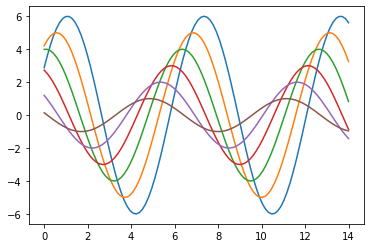

In [30]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sinplot()

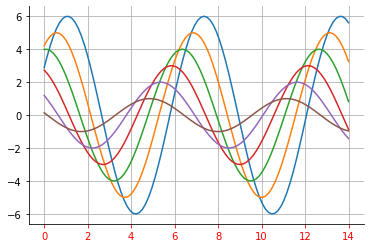

In [31]:
#1
def estilo(sty = "whitegrid"):
    param = {'axes.facecolor': 'white',
             'axes.edgecolor': 'black',
             'axes.grid': True,
             'axes.axisbelow': 'line',
             'axes.labelcolor': 'black',
             'figure.facecolor': (1, 1, 1, 0),
             'grid.color': '#b0b0b0',
             'grid.linestyle': '-',
             'text.color': 'black',
             'xtick.color': 'red',
             'ytick.color': 'black',
             'xtick.direction': 'out',
             'ytick.direction': 'out',
             'lines.solid_capstyle': 'projecting',
             'patch.edgecolor': 'black',
             'image.cmap': 'viridis',
             'font.family': ['sans-serif'],
             'font.sans-serif': ['DejaVu Sans',
             'Bitstream Vera Sans',
             'Computer Modern Sans Serif',
             'Lucida Grande',
             'Verdana',
             'Geneva',
             'Lucid',
             'Arial',
             'Helvetica',
             'Avant Garde',
             'sans-serif'],
             'patch.force_edgecolor': False,
             'xtick.bottom': True,
             'xtick.top': False,
             'ytick.left': True,
             'ytick.right': False,
             'axes.spines.left': True,
             'axes.spines.bottom': True,
             'axes.spines.right': False,
             'axes.spines.top': False}
    sns.set_style(sty, param)

estilo()
sinplot()

In [32]:
#2
df_STD = df.copy()
[print("'" + df_STD.columns[i] + "',") for i in range(len(df_STD.columns))]
print()

'details',
'furnished',
'metrocuadrado_index',
'n_bath',
'n_rooms',
'price',
'surface',
'url',
'property_type',
'rent_type',
'location',
'price_by_m2',
'n_garajes',
'tipo_producto',
'UPZ_Codigo',
'UPlTipo',
'UPlNombre',
'UPlArea',
'nomupz',
'personas',
'trabajoinf_ninos_5_17_anos_perc',
'trabajoinfampliado_ninos_5_17_anos_perc',
'jovenes_14_24_anos_nini_perc',
'indice_envegecimiento',
'jefe_mujer_perc',
'adultos_mayores_pobres_perc',
'UPlNombre2',
'indice_inseguridad',
'upz',
'areas_verdes_perc',
'densidad_pobl',



In [143]:


general_info = ['n_rooms',
                'n_bath',
                'metrocuadrado_index',
                'furnished',
                'property_type',
                'rent_type',
                'price_by_m2',
                'n_garajes',
                'tipo_producto',
                'trabajoinf_ninos_5_17_anos_perc',
                'trabajoinfampliado_ninos_5_17_anos_perc',
                'jovenes_14_24_anos_nini_perc',
                'indice_envegecimiento',
                'jefe_mujer_perc',
                'adultos_mayores_pobres_perc',
                'indice_inseguridad',
                'areas_verdes_perc',
                'densidad_pobl']

property_info = ['price', 
                 'n_rooms', 
                 'n_bath', 
                 'surface', 
                 'metrocuadrado_index', 
                 "furnished", 
                 "property_type", 
                 "rent_type",
                 "location", 
                 "price by m2", 
                 "n_garajes", 
                 "UPlCodigo"]

location_info = ["location", "price by m2", "surface", "UPlCodigo"]

numerical_info = [  'price',
                    'surface',
                    'metrocuadrado_index',
                    #'price_by_m2',
                    'personas',
                    #'UPlArea',
                    'trabajoinf_ninos_5_17_anos_perc',
                    'trabajoinfampliado_ninos_5_17_anos_perc',
                    'jovenes_14_24_anos_nini_perc',
                    'indice_envegecimiento',
                    'jefe_mujer_perc',
                    'adultos_mayores_pobres_perc',
                    'indice_inseguridad',
                    'areas_verdes_perc',
                    'densidad_pobl']

ordinal_info = [ 'n_rooms',
                 'n_bath',
                 'n_garajes']

ordinal_cat = [['NA','0','1','2','3','4','5','5+'],
               ['NA','0','1','2','3','4','5','5+'],
               ['NA','0','1','2','3','4','4+'],]

other_info = [  'price_by_m2',
                'details',
                'url',
                'UPlTipo',
                'UPlNombre',
                'UPlNombre2',
                'upz',
                'location',
                 'nomupz',
                 'UPlArea',
                 'UPZ_Codigo']

categorical_info = list(set(df_STD.columns) - set(numerical_info) -set(ordinal_info) - set(other_info))

In [144]:
categorical_info

['property_type', 'furnished', 'rent_type', 'tipo_producto']

In [145]:
info1 = pd.DataFrame()
info2 = pd.DataFrame()
info3 = pd.DataFrame()
info4 = pd.DataFrame() 

info1['Informacion Numerica'] = numerical_info
info2['Informacion Categorica'] = categorical_info
info3['Informacion Ordinal'] = ordinal_info
info4['Otros'] = other_info
info = pd.concat([info1,info2,info3,info4],ignore_index=True, axis=1)
info.columns = ['Informacion Numerica','Informacion Categorica','Informacion Ordinal','Otros']
print(info.to_latex(index=False))  

\begin{tabular}{llll}
\toprule
                    Informacion Numerica & Informacion Categorica & Informacion Ordinal &        Otros \\
\midrule
                                   price &          property\_type &             n\_rooms &  price\_by\_m2 \\
                                 surface &              furnished &              n\_bath &      details \\
                     metrocuadrado\_index &              rent\_type &           n\_garajes &          url \\
                                personas &          tipo\_producto &                 NaN &      UPlTipo \\
         trabajoinf\_ninos\_5\_17\_anos\_perc &                    NaN &                 NaN &    UPlNombre \\
 trabajoinfampliado\_ninos\_5\_17\_anos\_perc &                    NaN &                 NaN &   UPlNombre2 \\
            jovenes\_14\_24\_anos\_nini\_perc &                    NaN &                 NaN &          upz \\
                   indice\_envegecimiento &                    NaN &                 NaN

In [146]:
mapping = [('numeric', col) for col in numerical_info]
mapping.extend([('categorical', col) for col in categorical_info])
mapping.extend([('ordinal', col) for col in ordinal_info])
'''
Se reordenan las columnas del dataframe para que coincidan con el esquema 
del multi indice
'''

df_cat = df_STD.reindex(columns=numerical_info + categorical_info + ordinal_info)

In [147]:
df_cat.columns = pd.MultiIndex.from_tuples(mapping)

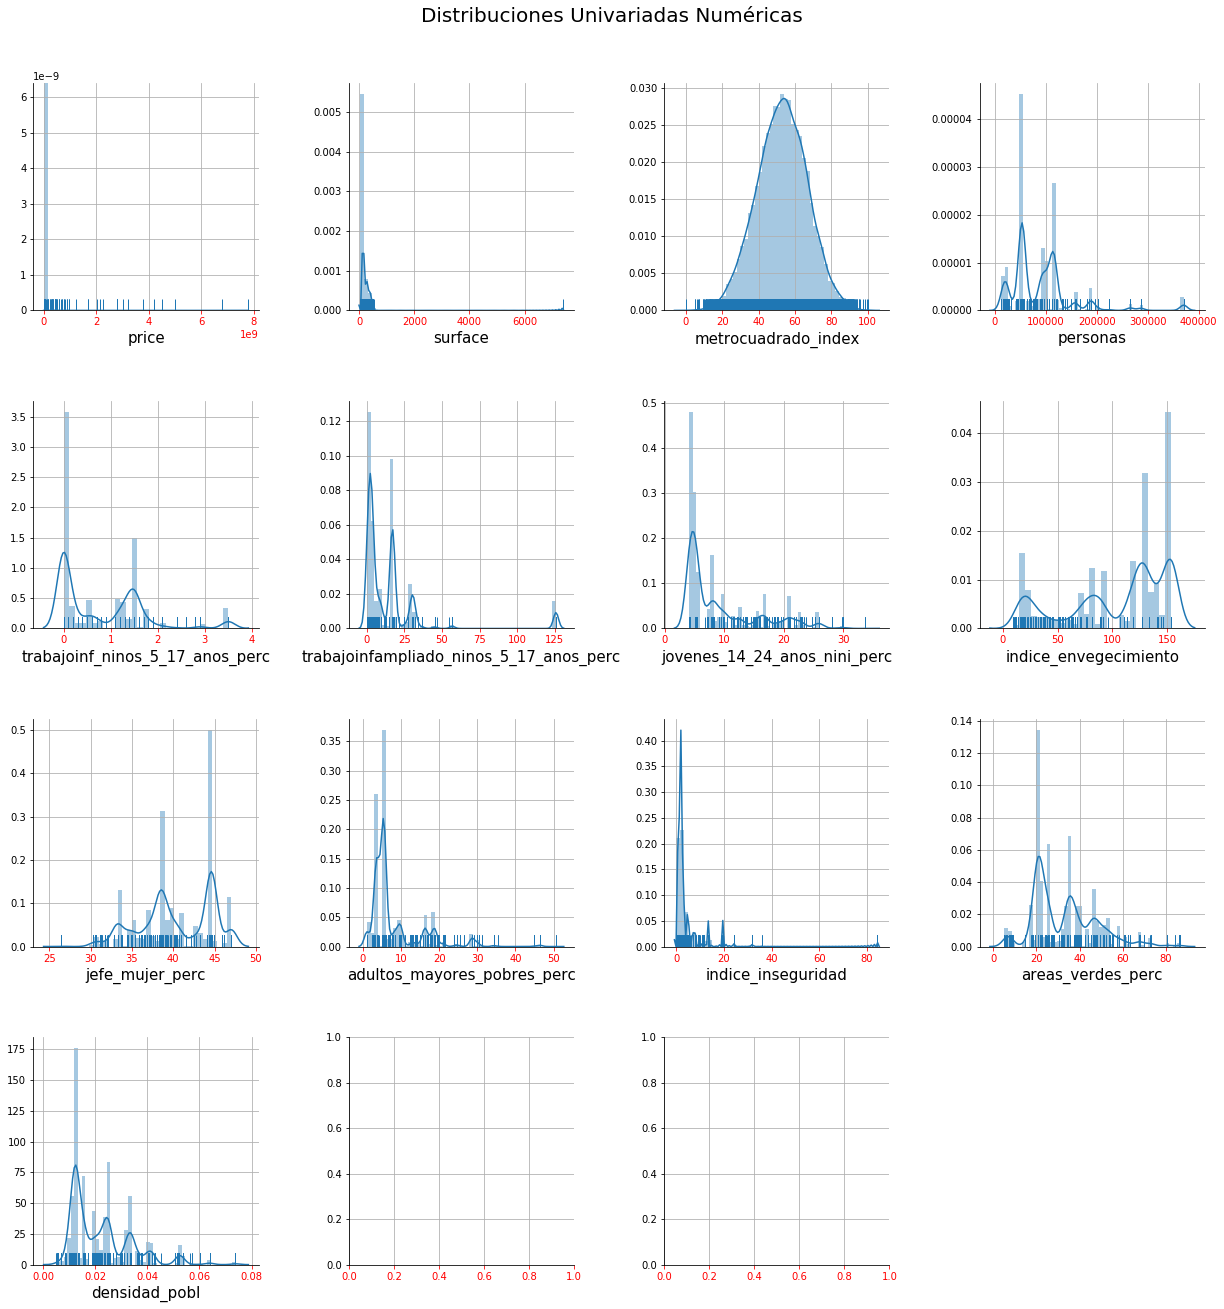

In [148]:
# Grilla de subplots
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=[17, 17])

# Se remueven el ultimo plot
list(map(lambda a : a.remove(), ax[-1,-1:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()

# Se define un titulo y su ubicacion
fig.suptitle('Distribuciones Univariadas Numéricas',
             fontsize=20,
             x=0.5,
             y=1.05)
'''
Se recorre cada axis, para cada columna del dataframe, se genera un grafico 
distinto en funcion del tipo de dato.

'''
for axis, col in zip(ax.flatten(), numerical_info):
    try :
        # Graficos para datos numericos
        sns.distplot(df_cat[('numeric', col)].dropna(), ax=axis, rug=True)
               
    except RuntimeError:
        sns.distplot(df_cat[('numeric', col)], ax=axis, rug=True, kde=False)
    
    axis.set_xlabel(col, fontsize=15)

# Se ajusta el espaciado interno entre subplots
w, h = (.4, .4)
plt.subplots_adjust(wspace=w, hspace=h)

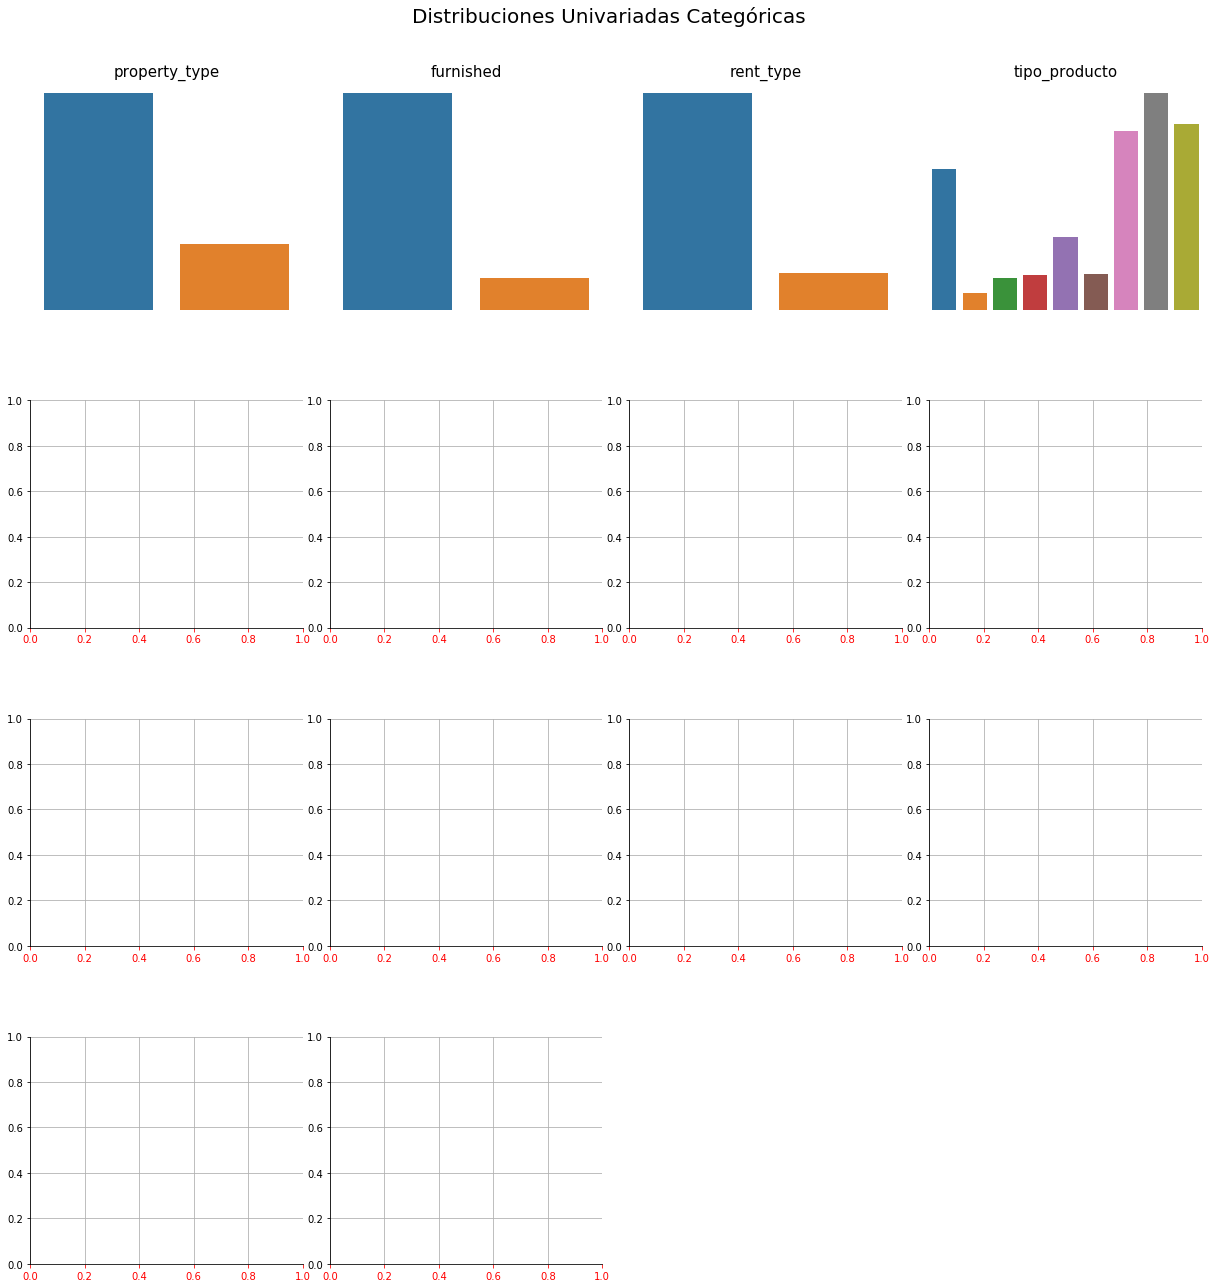

In [149]:
# Grilla de subplots
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=[17, 17])

# Se remueven el ultimo plot
list(map(lambda a : a.remove(), ax[-1,-2:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()

# Se define un titulo y su ubicacion
fig.suptitle('Distribuciones Univariadas Categóricas',
             fontsize=20,
             x=0.5,
             y=1.05)
'''
Se recorre cada axis, para cada columna del dataframe, se genera un grafico 
distinto en funcion del tipo de dato.

'''
for axis, col in zip(ax.flatten(), categorical_info):

    # Graficos para datos tipos str
    sns.countplot(df_cat[('categorical',col)], ax=axis)
    axis.set_axis_off()
    axis.set_title(col, fontsize=15)
  
    
# Se ajusta el espaciado interno entre subplots
h, w = (.4, .1)
plt.subplots_adjust(wspace=w, hspace=h)

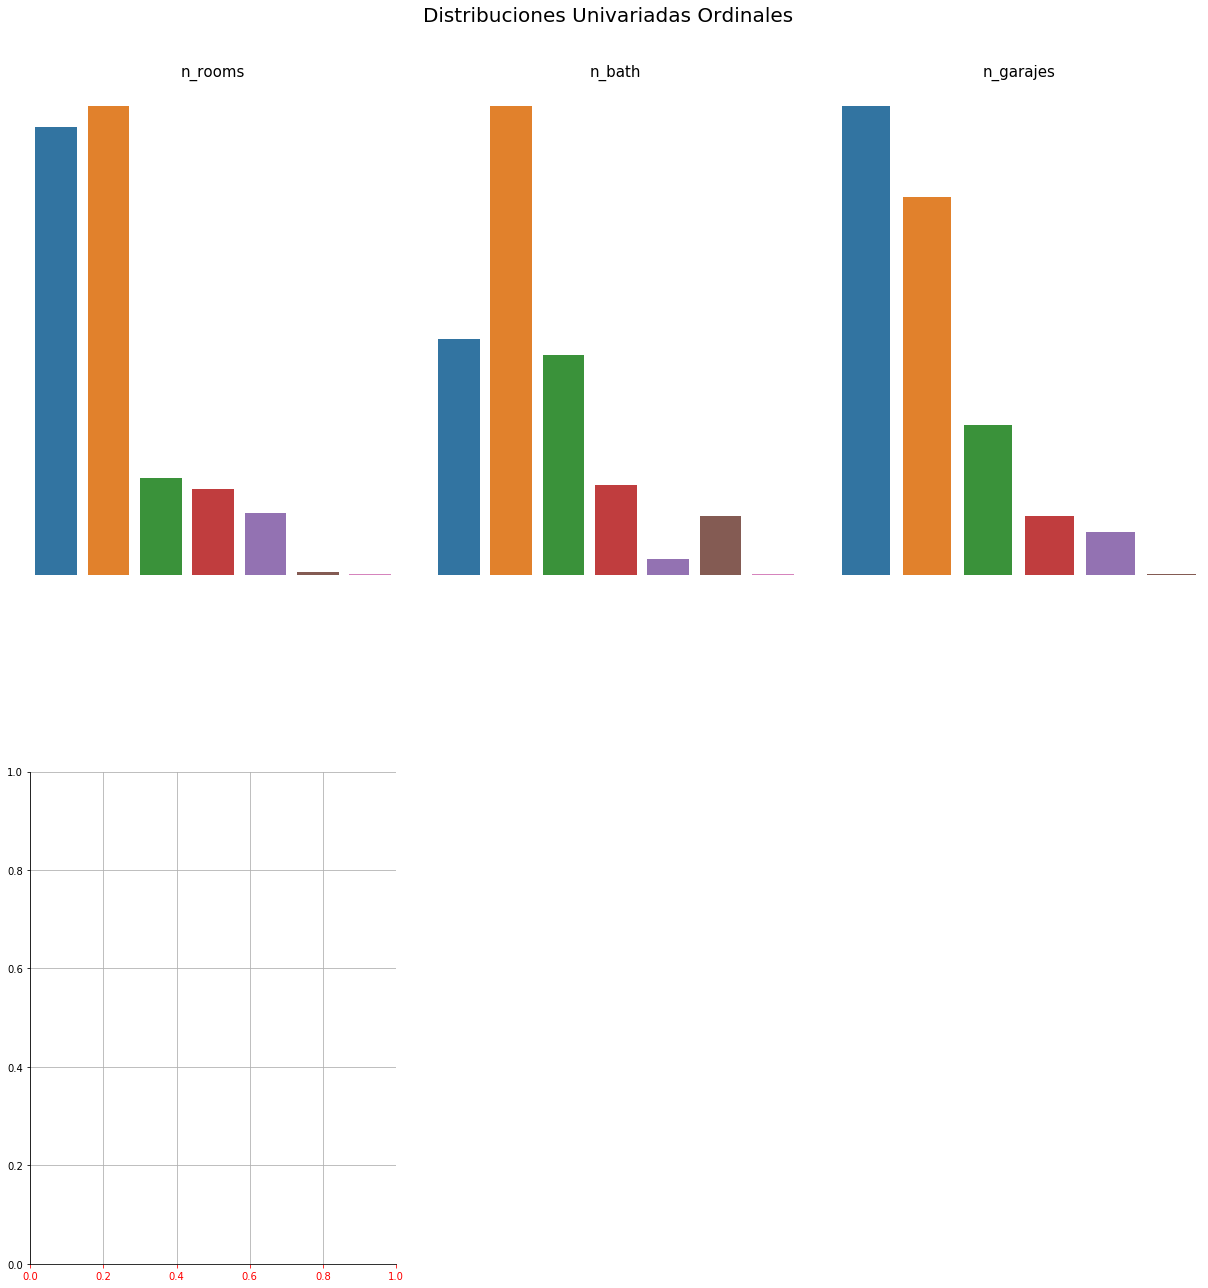

In [150]:
# Grilla de subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=[17, 17])

# Se remueven el ultimo plot
list(map(lambda a : a.remove(), ax[-1,-2:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()

# Se define un titulo y su ubicacion
fig.suptitle('Distribuciones Univariadas Ordinales',
             fontsize=20,
             x=0.5,
             y=1.05)
'''
Se recorre cada axis, para cada columna del dataframe, se genera un grafico 
distinto en funcion del tipo de dato.

'''
for axis, col in zip(ax.flatten(), ordinal_info):

    # Graficos para datos tipos str
    sns.countplot(df_cat[('ordinal',col)], ax=axis)
    axis.set_axis_off()
    axis.set_title(col, fontsize=15)
  
    
# Se ajusta el espaciado interno entre subplots
h, w = (.4, .1)
plt.subplots_adjust(wspace=w, hspace=h)

In [151]:
#3
df_STD.replace('nan',np.nan, inplace = True) 
null_values = pd.DataFrame()
null_values['variables'] = df_STD.columns
null_values['null values'] = [df_STD[df_STD.columns[i]].isna().sum() for i in range(len(df_STD.columns))]

print(null_values)

df_STD.info()

                                  variables  null values
0                                   details          110
1                                 furnished            0
2                       metrocuadrado_index            0
3                                    n_bath            0
4                                   n_rooms            0
5                                     price            3
6                                   surface           19
7                                       url            0
8                             property_type            0
9                                 rent_type            0
10                                 location            0
11                              price_by_m2           22
12                                n_garajes            0
13                            tipo_producto            0
14                               UPZ_Codigo         1946
15                                  UPlTipo         1946
16                             

In [152]:
df_STD.isnull().sum().nlargest(10)

UPZ_Codigo                                 1946
UPlTipo                                    1946
UPlNombre                                  1946
UPlArea                                    1946
nomupz                                     1946
personas                                   1946
trabajoinf_ninos_5_17_anos_perc            1946
trabajoinfampliado_ninos_5_17_anos_perc    1946
jovenes_14_24_anos_nini_perc               1946
indice_envegecimiento                      1946
dtype: int64

In [153]:
df_STD.dropna(subset=['UPZ_Codigo']).isnull().sum().nlargest(10)

details                50
price_by_m2            21
surface                18
price                   3
furnished               0
metrocuadrado_index     0
n_bath                  0
n_rooms                 0
url                     0
property_type           0
dtype: int64

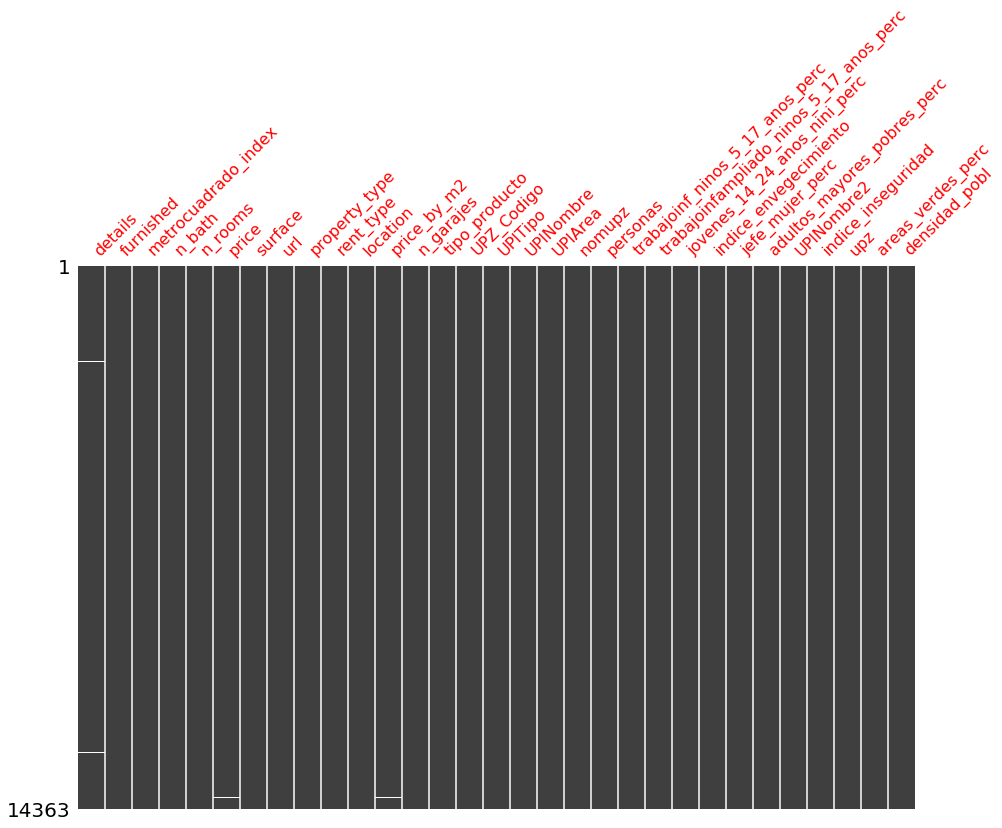

In [154]:
import missingno as msno
fig, ax = plt.subplots(figsize = [15, 10])
msno.matrix(df_STD.dropna(subset=['UPZ_Codigo']),ax = ax, sparkline=False)

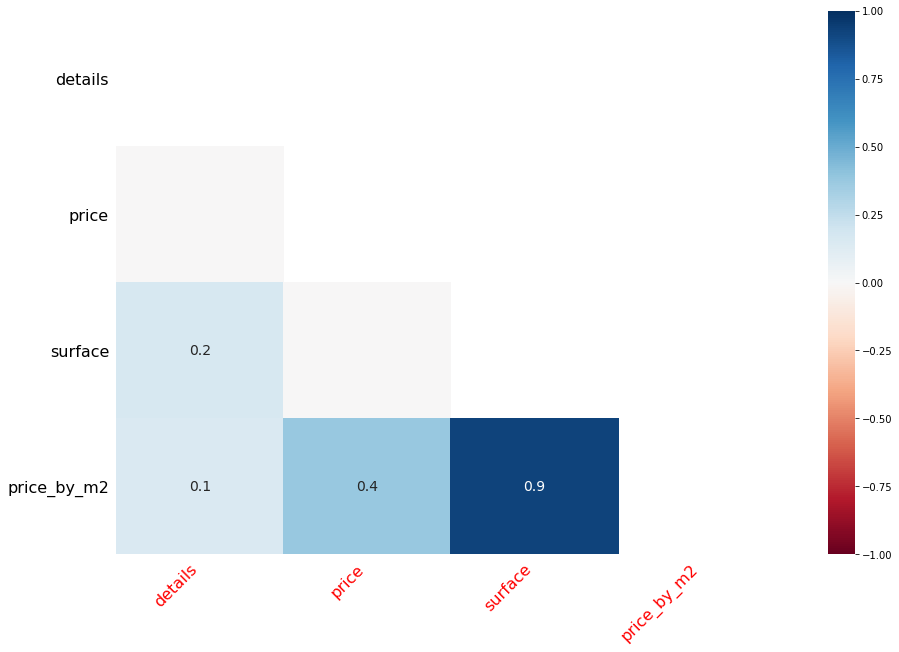

In [155]:
fig, ax = plt.subplots(figsize = [15, 10])
msno.heatmap(df_STD.dropna(subset=['UPZ_Codigo']), ax = ax)

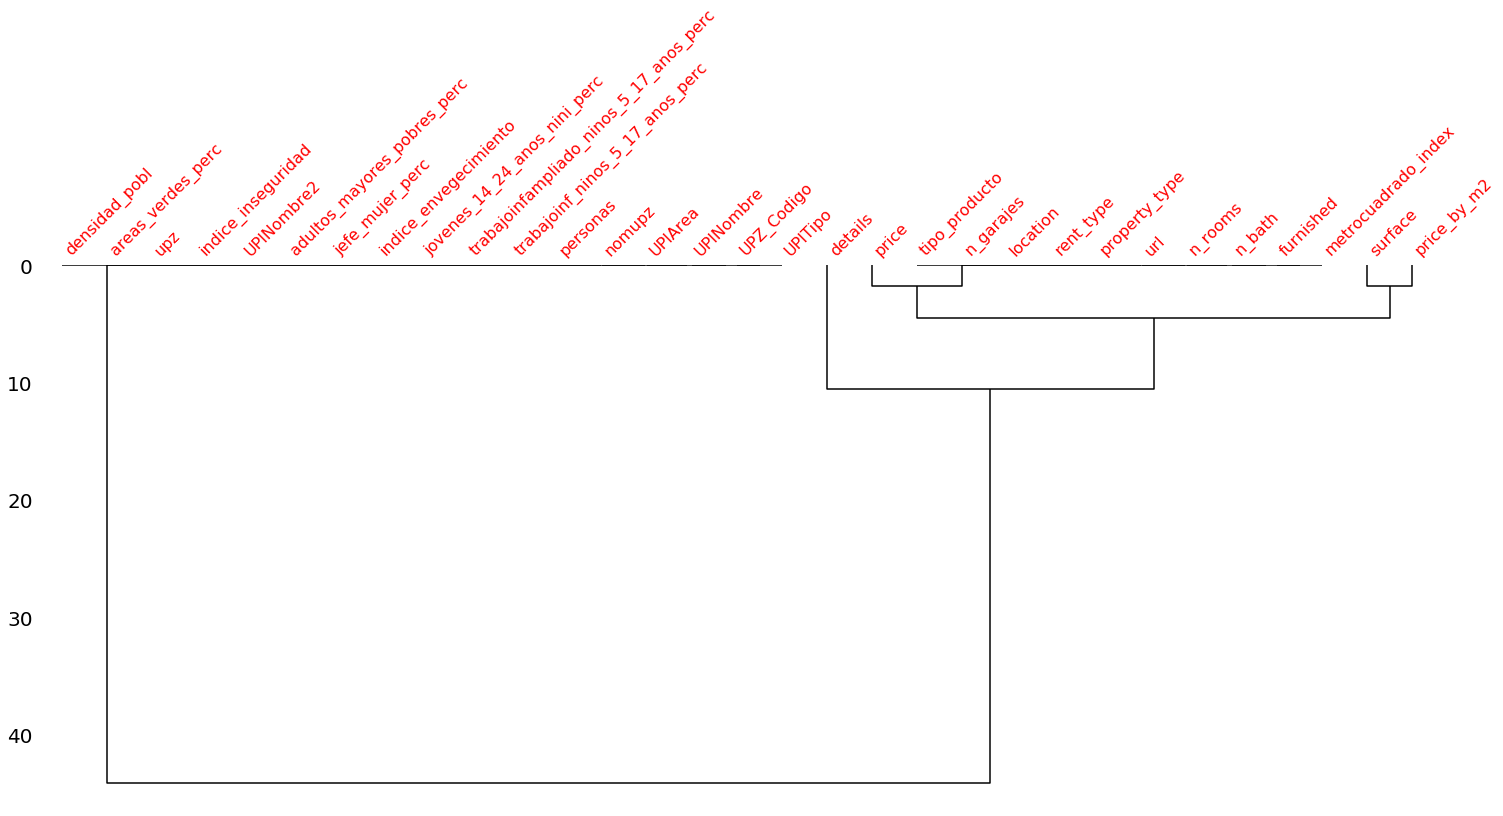

In [156]:
msno.dendrogram(df_STD)

In [157]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Pipeline categorica
cat_pipe = Pipeline(
    steps=[('imputer_cat', SimpleImputer(strategy='constant', fill_value='missing')), 
           ('onehot',OneHotEncoder(sparse=False, handle_unknown='ignore'))])

In [158]:
# Pipeline Numerica
num_pipe = Pipeline(steps=[('scaler', StandardScaler())])

In [159]:
# Pipeline Ordinal
ord_pipe = Pipeline(
    steps=[('imputer_ord', SimpleImputer(strategy='constant', fill_value='NA')),
           ('ordinal', OrdinalEncoder(categories = ordinal_cat))])

In [160]:
#Preprocesador Compuesto
prep = ColumnTransformer(
    transformers=[('num', num_pipe, numerical_info), 
                  ('cat', cat_pipe, categorical_info), 
                  ('ord', ord_pipe, ordinal_info)])

In [161]:
df_STD.columns

Index(['details', 'furnished', 'metrocuadrado_index', 'n_bath', 'n_rooms',
       'price', 'surface', 'url', 'property_type', 'rent_type', 'location',
       'price_by_m2', 'n_garajes', 'tipo_producto', 'UPZ_Codigo', 'UPlTipo',
       'UPlNombre', 'UPlArea', 'nomupz', 'personas',
       'trabajoinf_ninos_5_17_anos_perc',
       'trabajoinfampliado_ninos_5_17_anos_perc',
       'jovenes_14_24_anos_nini_perc', 'indice_envegecimiento',
       'jefe_mujer_perc', 'adultos_mayores_pobres_perc', 'UPlNombre2',
       'indice_inseguridad', 'upz', 'areas_verdes_perc', 'densidad_pobl'],
      dtype='object')

In [162]:
# Variables regresoras
X = df_STD.drop(['price_by_m2'], axis=1).copy()
X.replace('-1',np.nan, inplace=True)

# Variable dependiente
y = df_STD['price_by_m2'].copy()

# Se preparan los datos
X_prep = prep.fit_transform(X)

In [163]:
post_cat = prep.named_transformers_['cat'][-1]
cat_cols_fit = post_cat.get_feature_names(categorical_info)

In [164]:
# columnas del datase luego de transformarlo
post_cols = list(numerical_info) +list( cat_cols_fit) + list(ordinal_info)
len(post_cols)

31

In [165]:
df_post = pd.DataFrame(data=X_prep, columns=post_cols)

In [166]:
df_post.shape

(16309, 31)

In [167]:
df_post

,price,surface,metrocuadrado_index,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,...,tipo_producto_2.0,tipo_producto_3.0,tipo_producto_4.0,tipo_producto_5.0,tipo_producto_6.0,tipo_producto_7.0,tipo_producto_8.0,n_rooms,n_bath,n_garajes
0,-0.048663,-0.645995,0.652246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0
1,-0.053134,-0.619767,-0.579677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0
2,-0.047121,-0.506111,0.253683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0
3,-0.048971,-0.462398,1.058056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0
4,-0.050590,-0.680966,-0.253580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,0.012237,1.854424,0.079764,-0.377033,-0.639575,0.093253,0.340655,-1.146086,-0.512801,-0.634562,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,6.0,4.0
16305,-0.054059,-0.068975,-2.369589,-0.538516,0.798225,-0.480688,1.360900,-1.463304,-1.485659,0.629432,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,2.0
16306,-0.059455,-0.217601,-0.797075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0
16307,-0.043266,0.490559,-0.304306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,3.0


In [168]:
df_post.isnull().sum().nlargest(20)

personas                                   1946
trabajoinf_ninos_5_17_anos_perc            1946
trabajoinfampliado_ninos_5_17_anos_perc    1946
jovenes_14_24_anos_nini_perc               1946
indice_envegecimiento                      1946
jefe_mujer_perc                            1946
adultos_mayores_pobres_perc                1946
indice_inseguridad                         1946
areas_verdes_perc                          1946
densidad_pobl                              1946
surface                                      19
price                                         3
metrocuadrado_index                           0
property_type_Apartamento                     0
property_type_Casa                            0
furnished_False                               0
furnished_True                                0
rent_type_Arriendo                            0
rent_type_Venta Y Arriendo                    0
tipo_producto_0.0                             0
dtype: int64

In [169]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

rf = RandomForestRegressor(random_state=0, n_estimators=5)
knn = KNeighborsRegressor(n_neighbors=8)

imputer_RF = IterativeImputer(estimator=rf,
                              skip_complete=True,
                              verbose=1,
                              random_state=1)

imputer_KNN = IterativeImputer(estimator=knn,
                              skip_complete=True,
                              verbose=1,
                              random_state=1)

In [170]:
df_tf_data = imputer_RF.fit_transform(df_post)

[IterativeImputer] Completing matrix with shape (16309, 31)
[IterativeImputer] Change: 5.486721705437101, scaled tolerance: 0.06366548749988417 
[IterativeImputer] Change: 7.858557086446804, scaled tolerance: 0.06366548749988417 
[IterativeImputer] Change: 11.384519856615565, scaled tolerance: 0.06366548749988417 
[IterativeImputer] Change: 7.299368897887684, scaled tolerance: 0.06366548749988417 
[IterativeImputer] Change: 4.663080330382872, scaled tolerance: 0.06366548749988417 
[IterativeImputer] Change: 5.025738533861887, scaled tolerance: 0.06366548749988417 
[IterativeImputer] Change: 5.823143812502851, scaled tolerance: 0.06366548749988417 
[IterativeImputer] Change: 6.592290112916936, scaled tolerance: 0.06366548749988417 
[IterativeImputer] Change: 7.2752623268698855, scaled tolerance: 0.06366548749988417 
[IterativeImputer] Change: 7.836189085408963, scaled tolerance: 0.06366548749988417 


/home/jose/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [171]:
df_tf = pd.DataFrame(df_tf_data, columns = df_post.columns)
df_tf

,price,surface,metrocuadrado_index,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,...,tipo_producto_2.0,tipo_producto_3.0,tipo_producto_4.0,tipo_producto_5.0,tipo_producto_6.0,tipo_producto_7.0,tipo_producto_8.0,n_rooms,n_bath,n_garajes
0,-0.048663,-0.645995,0.652246,-0.354828,0.687625,-0.222011,0.055635,-0.990083,-0.506812,-0.377731,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0
1,-0.053134,-0.619767,-0.579677,-0.354828,0.687625,-0.222011,0.055635,-0.990083,-0.506812,-0.377731,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0
2,-0.047121,-0.506111,0.253683,-0.354828,0.687625,-0.222011,0.055635,-0.990083,-0.506812,-0.377731,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0
3,-0.048971,-0.462398,1.058056,-0.354828,0.687625,-0.222011,0.055635,-0.990083,-0.506812,-0.377731,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0
4,-0.050590,-0.680966,-0.253580,-0.354828,0.687625,-0.222011,0.055635,-0.990083,-0.506812,-0.377731,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,0.012237,1.854424,0.079764,-0.377033,-0.639575,0.093253,0.340655,-1.146086,-0.512801,-0.634562,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,6.0,4.0
16305,-0.054059,-0.068975,-2.369589,-0.538516,0.798225,-0.480688,1.360900,-1.463304,-1.485659,0.629432,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,2.0
16306,-0.059455,-0.217601,-0.797075,-0.354828,0.687625,-0.222011,0.055635,-0.990083,-0.506812,-0.377731,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0
16307,-0.043266,0.490559,-0.304306,-0.354828,0.687625,-0.222011,0.055635,-0.990083,-0.506812,-0.377731,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,3.0


In [172]:
df_tf.isnull().sum().nlargest(20)

price                                      0
surface                                    0
metrocuadrado_index                        0
personas                                   0
trabajoinf_ninos_5_17_anos_perc            0
trabajoinfampliado_ninos_5_17_anos_perc    0
jovenes_14_24_anos_nini_perc               0
indice_envegecimiento                      0
jefe_mujer_perc                            0
adultos_mayores_pobres_perc                0
indice_inseguridad                         0
areas_verdes_perc                          0
densidad_pobl                              0
property_type_Apartamento                  0
property_type_Casa                         0
furnished_False                            0
furnished_True                             0
rent_type_Arriendo                         0
rent_type_Venta Y Arriendo                 0
tipo_producto_0.0                          0
dtype: int64

In [173]:
"""
def violin_plot(x,y,df=df_cat):
    fontdict = {'fontsize':20}

    # Estrucutra de figura y axes
    fig, ax = plt.subplots(2,1,figsize=[12,13])

    # violin plot --> equivalente a catplot(kind = 'violin')

    sns.violinplot(x,
                y=y,
                data=df,
                kind='violin',
                ax=ax[0])

    sns.countplot(df[x], ax=ax[1])

    ax[0].set_xlabel(x[1], fontdict)
    ax[1].set_xlabel(x[1], fontdict)

    ax[0].set_ylabel(y[1], fontdict)
    ax[0].set_title('Violin plot' + x[1] + ' vs ' + y[1], fontdict)
    ax[1].set_title('Frecuencias ' + x[1], fontdict)

    h, w = (.3, .1)
    plt.subplots_adjust(wspace=w, hspace=h)
    

y_plot = [  'price',
            'metrocuadrado_index',
            'price_by_m2',
            'trabajoinf_ninos_5_17_anos_perc',
            'trabajoinfampliado_ninos_5_17_anos_perc',
            'jovenes_14_24_anos_nini_perc',
            'indice_envegecimiento',
            'jefe_mujer_perc',
            'adultos_mayores_pobres_perc',
            'indice_inseguridad',
            'areas_verdes_perc',
            'Densidad']

x_plot = ['UPZ_Codigo', 'tipo_producto', 'n_bath', 'n_rooms', 'n_garajes']

for x in x_plot:
    for y in y_plot:
        violin_plot(x=('categorical', x), y = ('numeric', y))

"""

"\ndef violin_plot(x,y,df=df_cat):\n    fontdict = {'fontsize':20}\n\n    # Estrucutra de figura y axes\n    fig, ax = plt.subplots(2,1,figsize=[12,13])\n\n    # violin plot --> equivalente a catplot(kind = 'violin')\n\n    sns.violinplot(x,\n                y=y,\n                data=df,\n                kind='violin',\n                ax=ax[0])\n\n    sns.countplot(df[x], ax=ax[1])\n\n    ax[0].set_xlabel(x[1], fontdict)\n    ax[1].set_xlabel(x[1], fontdict)\n\n    ax[0].set_ylabel(y[1], fontdict)\n    ax[0].set_title('Violin plot' + x[1] + ' vs ' + y[1], fontdict)\n    ax[1].set_title('Frecuencias ' + x[1], fontdict)\n\n    h, w = (.3, .1)\n    plt.subplots_adjust(wspace=w, hspace=h)\n    \n\ny_plot = [  'price',\n            'metrocuadrado_index',\n            'price_by_m2',\n            'trabajoinf_ninos_5_17_anos_perc',\n            'trabajoinfampliado_ninos_5_17_anos_perc',\n            'jovenes_14_24_anos_nini_perc',\n            'indice_envegecimiento',\n            'jefe_muje

In [174]:
#4
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [180]:
## JS
data = df.dropna()
data = data.reset_index(drop=True)

In [181]:
X = df_tf

"""
labels = X['property_type'].unique().tolist()
mapping = dict( zip(labels,range(len(labels))) )
X.replace({'property_type': mapping},inplace=True)


labels = X['rent_type'].unique().tolist()
mapping = dict( zip(labels,range(len(labels))) )
X.replace({'rent_type': mapping},inplace=True)

X.replace([np.inf, -np.inf], np.nan).dropna(subset=["price_by_m2", "Densidad"], how="all", inplace = True)

"""

X_data = X.values
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_data)

In [182]:
labels = KMeans(n_clusters = 5, random_state = 13).fit_predict(X_scaled)

In [183]:
X['labels'] = labels
X['labels'].value_counts()

3    3861
2    3773
4    3317
1    3194
0    2164
Name: labels, dtype: int64

In [185]:
data.shape

(14297, 31)

In [186]:
X.shape

(16309, 32)

In [196]:
## JS
data['Cluster'] = X.dropna()['labels'].reset_index(drop=True)
for i in range(0,5):
    data.loc[data['Cluster'] == i, 'Cluster'] = 'Cluster_{}'.format(i)

# guardar data en csv
data.to_csv('data.csv', index=False)

In [ ]:
# verificar datos bien guardados
data2 = pd.read_csv('data.csv')
data2.head(3)

In [187]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

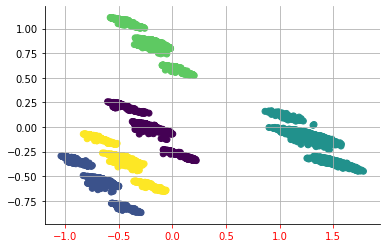

In [188]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels)

In [189]:
#5

pca = PCA(n_components=10)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
coef = pca.transform(np.identity(X_scaled.shape[1]))

In [190]:
X_data.shape

(16309, 32)

In [191]:
X.loc[0]

price                                     -0.048663
surface                                   -0.645995
metrocuadrado_index                        0.652246
personas                                  -0.354828
trabajoinf_ninos_5_17_anos_perc            0.687625
trabajoinfampliado_ninos_5_17_anos_perc   -0.222011
jovenes_14_24_anos_nini_perc               0.055635
indice_envegecimiento                     -0.990083
jefe_mujer_perc                           -0.506812
adultos_mayores_pobres_perc               -0.377731
indice_inseguridad                         0.613787
areas_verdes_perc                          1.450612
densidad_pobl                             -0.667070
property_type_Apartamento                  1.000000
property_type_Casa                         0.000000
furnished_False                            1.000000
furnished_True                             0.000000
rent_type_Arriendo                         1.000000
rent_type_Venta Y Arriendo                 0.000000
tipo_product

In [192]:
X_data[0]

array([-0.04866258, -0.64599475,  0.65224631, -0.35482819,  0.68762517,
       -0.22201067,  0.05563472, -0.99008335, -0.50681238, -0.37773146,
        0.61378685,  1.45061205, -0.66706993,  1.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  2.        ,  2.        ,
        2.        ,  4.        ])

In [193]:
pca_10 = pd.DataFrame(coef, index=df_tf.columns).abs()
pca_10

,0,1,2,3,4,5,6,7,8,9
price,0.481731,0.076834,0.248734,0.319792,0.447311,0.306964,0.211189,0.359938,0.144367,0.439675
surface,0.495322,0.073552,0.249876,0.324088,0.444847,0.306276,0.209374,0.360100,0.142528,0.422843
metrocuadrado_index,0.418683,0.084185,0.280247,0.364372,0.467595,0.316582,0.162331,0.362264,0.111955,0.392540
personas,0.502172,0.066718,0.247733,0.256488,0.475260,0.452363,0.367911,0.569398,0.076717,0.124910
trabajoinf_ninos_5_17_anos_perc,0.517102,0.046924,0.196250,0.228880,0.532972,0.438408,0.365946,0.357118,0.284151,0.080062
trabajoinfampliado_ninos_5_17_anos_perc,0.460548,0.064273,0.223969,0.329071,0.467433,0.245594,0.120761,0.188274,0.266510,0.594743
jovenes_14_24_anos_nini_perc,0.523243,0.050710,0.191699,0.201633,0.508757,0.590880,0.454837,0.298594,0.115866,0.663169
indice_envegecimiento,0.364860,0.119732,0.367797,0.549802,0.324137,0.163600,0.223004,0.286567,0.185873,0.204735
jefe_mujer_perc,0.416644,0.071742,0.285154,0.410794,0.394984,0.211044,0.008410,0.189728,0.148987,0.778148
adultos_mayores_pobres_perc,0.494451,0.062858,0.220405,0.262772,0.473457,0.465870,0.340513,0.327196,0.117701,0.628709


In [194]:
pca_10.idxmax()

0            property_type_Casa
1             tipo_producto_7.0
2    rent_type_Venta Y Arriendo
3                furnished_True
4             tipo_producto_6.0
5             tipo_producto_0.0
6             tipo_producto_8.0
7                      personas
8             tipo_producto_4.0
9               jefe_mujer_perc
dtype: object

In [78]:
def scatter_dists(col, df=df_STD, h=.3, w=.1, fontdict={'fontsize': 20}, reg=True):
    ''' Recibe una columna numerica y genera una visualizacion comparativa.
    
    Genera una figura por sobre el dataframe HousePricing (por defecto), recibe 
    parametros extra como el espaciado entre subfigura.
    
    Args:
    ----------
    
    col: String
         El nombre de la columna numerica a visualizar
    
    h,w: float
        Espaciado entre subplot h -> vertical, w -> horizontal
    
    fontdict: dict
             Permite configurar las fuentes de los subplots
    reg: bool
         Permite graficar una regresion lineal sobre los datos (if True)
        
    Returns: None
        Se muestra una figura en pantalla    
    
    '''

    # Estrucutra de figura y axes
    fig, ax = plt.subplots(2, 1, figsize=[12, 13])

    # violin plot --> equivalente a catplot(kind = 'violin')

    if reg:
        sns.regplot(x=df[('numeric', col)],
                    y=df[('numeric', 'SalePrice')],
                    ax=ax[0])
        ax[0].set_title('Regplot plot {} vs SalePrice'.format(col), fontdict)
    else:
        sns.scatterplot(('numeric', col),
                        y=('numeric', 'SalePrice'),
                        data=df,
                        ax=ax[0])
        ax[0].set_title('Scatter plot {} vs SalePrice'.format(col), fontdict)

    
    # Distribucion univariada
    sns.distplot(df[('numeric', col)], ax=ax[1])

    ax[0].set_xlabel(col, fontdict)
    ax[1].set_xlabel(col, fontdict)

    ax[0].set_ylabel('SalePrice', fontdict)
    ax[1].set_title('Frecuencias {}'.format(col), fontdict)

    plt.subplots_adjust(wspace=w, hspace=h)